In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_games = pd.read_parquet(r'C:\Users\llaur\Documents\Proyecto_individual\PI MLOps - STEAM\data\steam_games2.parquet')
df_reviews = pd.read_parquet(r'C:\Users\llaur\Documents\Proyecto_individual\PI MLOps - STEAM\data\user_reviews.parquet')


In [23]:
df= pd.merge(df_games, df_reviews, on='item_id')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44739 entries, 0 to 44738
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   44739 non-null  object 
 1   price                      44739 non-null  float64
 2   item_id                    44739 non-null  int64  
 3   developer                  44739 non-null  object 
 4   release_year               44739 non-null  int64  
 5   Accounting                 44739 non-null  int64  
 6   Action                     44739 non-null  int64  
 7   Adventure                  44739 non-null  int64  
 8   Animation &amp; Modeling   44739 non-null  int64  
 9   Audio Production           44739 non-null  int64  
 10  Casual                     44739 non-null  int64  
 11  Design &amp; Illustration  44739 non-null  int64  
 12  Early Access               44739 non-null  int64  
 13  Education                  44739 non-null  int

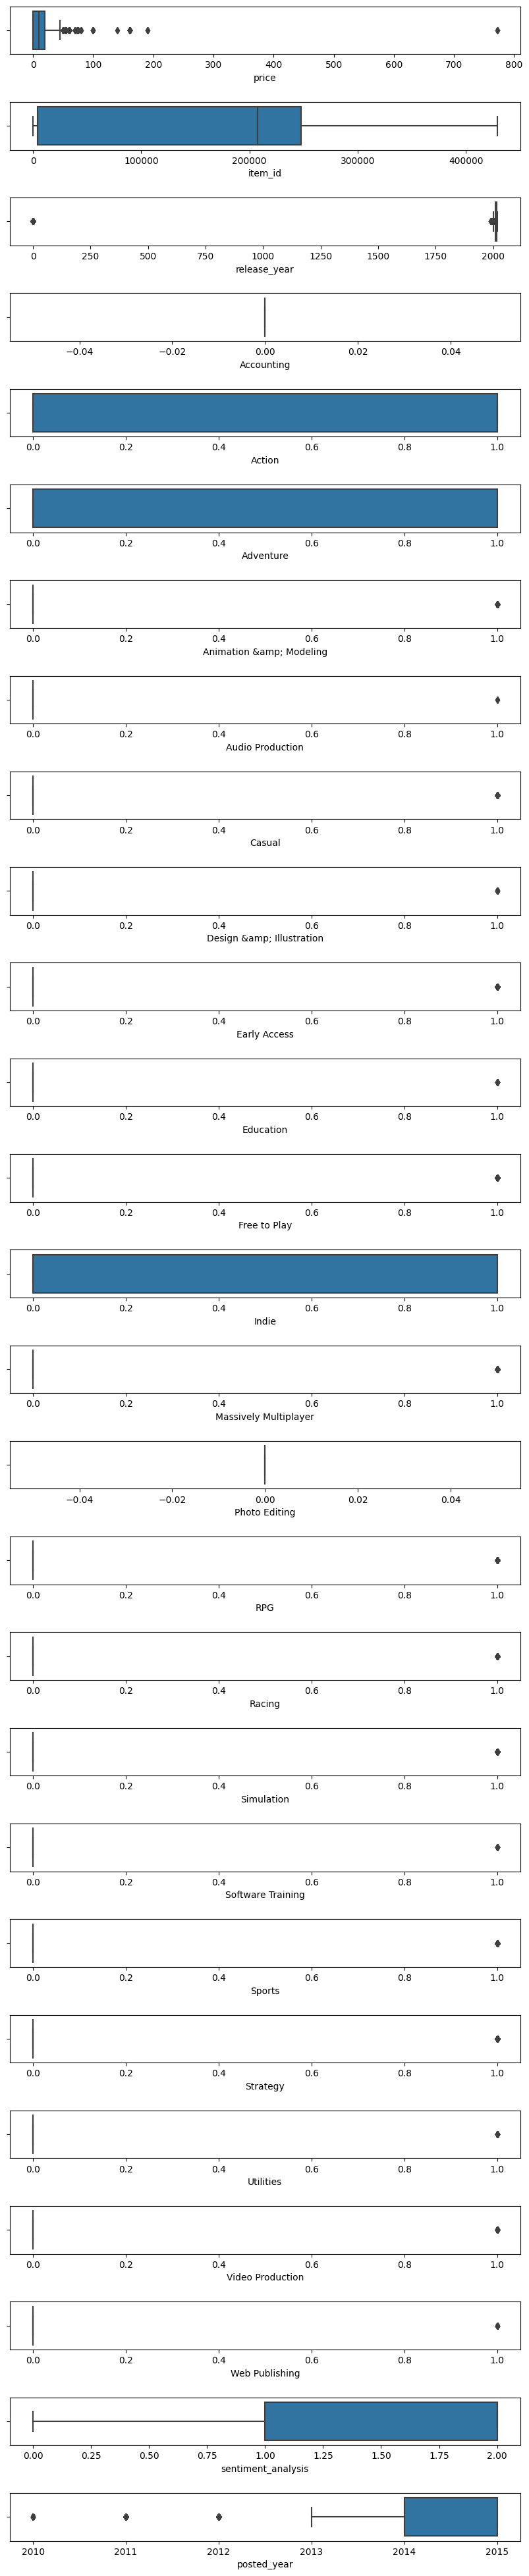

In [14]:
#Visualizamos los datos numéricos con un boxplot para ver si hay outliers
columnas_num2 = df.select_dtypes(np.number).columns
fig, ax = plt.subplots(nrows=len(columnas_num2), ncols=1, figsize=(10, 50), gridspec_kw={'hspace': 1.0})
for i, col in enumerate(columnas_num2):
    sns.boxplot(x=col, data=df, ax=ax[i])


- Vemos que en el diagrama de cajas, la mayorías de las columnas son generos de videjuegos, por lo que son valores 0 o 1, por lo que no hay outliers. Lo único raro que observamos, es que hay valores de precio que valen casi 800 dlls

In [25]:
caros = df['price'].sort_values(ascending=False).head()
caros 

14021    771.71
14020    771.71
14019    771.71
23702    189.96
23703    189.96
Name: price, dtype: float64

- Vemos que el juego más caro vale 771.71 dlls, vamos a optar por eliminarlos ya que es un precio poco realista

In [26]:
precios_a_eliminar= [771.71]
df = df[~df['price'].isin(precios_a_eliminar)]


In [28]:
caros =df['price'].sort_values(ascending=False).head()
caros

23702    189.96
23703    189.96
23704    189.96
32451    160.91
32449    160.91
Name: price, dtype: float64

In [29]:
#Observamos si hay valores nulos
n_records = len(df)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(df)

app_name | 0.0 | object
price | 0.0 | float64
item_id | 0.0 | int64
developer | 0.0 | object
release_year | 0.0 | int64
Accounting | 0.0 | int64
Action | 0.0 | int64
Adventure | 0.0 | int64
Animation &amp; Modeling | 0.0 | int64
Audio Production | 0.0 | int64
Casual | 0.0 | int64
Design &amp; Illustration | 0.0 | int64
Early Access | 0.0 | int64
Education | 0.0 | int64
Free to Play | 0.0 | int64
Indie | 0.0 | int64
Massively Multiplayer | 0.0 | int64
Photo Editing | 0.0 | int64
RPG | 0.0 | int64
Racing | 0.0 | int64
Simulation | 0.0 | int64
Software Training | 0.0 | int64
Sports | 0.0 | int64
Strategy | 0.0 | int64
Utilities | 0.0 | int64
Video Production | 0.0 | int64
Web Publishing | 0.0 | int64
user_id | 0.0 | object
helpful | 0.0 | object
recommend | 0.0 | bool
sentiment_analysis | 0.0 | int64
posted_year | 0.0 | int64
